Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.
  ->Attribute Information:
1) ID number
2) Diagnosis (M = malignant, B = benign)

  ->Ten real-valued features are computed for each cell nucleus:
a) radius (mean of distances from center to points on the perimeter)
b) texture (standard deviation of gray-scale values)
c) perimeter
d) area
e) smoothness (local variation in radius lengths)
f) compactness (perimeter^2 / area - 1.0)
g) concavity (severity of concave portions of the contour)
h) concave points (number of concave portions of the contour)
i) symmetry
j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.


***ImportingDependenciesAndCheckingInsudeData***

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report,roc_curve,roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)

In [2]:
df = pd.read_csv('breast_Cancer.csv')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [6]:
df.shape

(569, 33)

That's mean 'Unnamed: 32' columns is totally full of NaN values
we can drop initially the 'id' and 'Unnamed: 32' columns

In [7]:
df = df.drop(columns=['id','Unnamed: 32'],axis=1)

In [8]:
df.shape

(569, 31)

In [9]:
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

***Visualization***

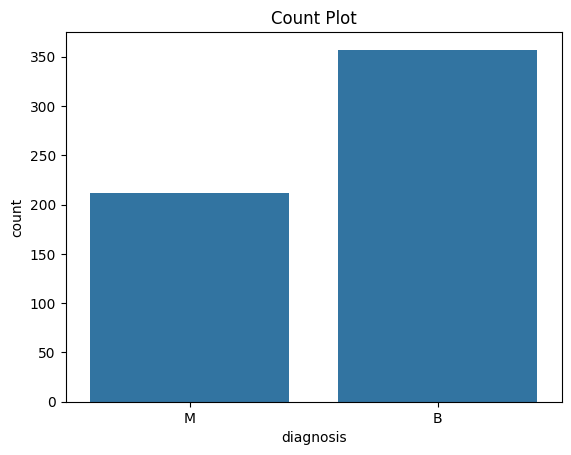

In [10]:
sns.countplot(x='diagnosis', data=df)
plt.title('Count Plot')
plt.show()

The dataset is not so good balanced

In [11]:
df['diagnosis'] = df['diagnosis'].replace({'M': 0, 'B': 1})

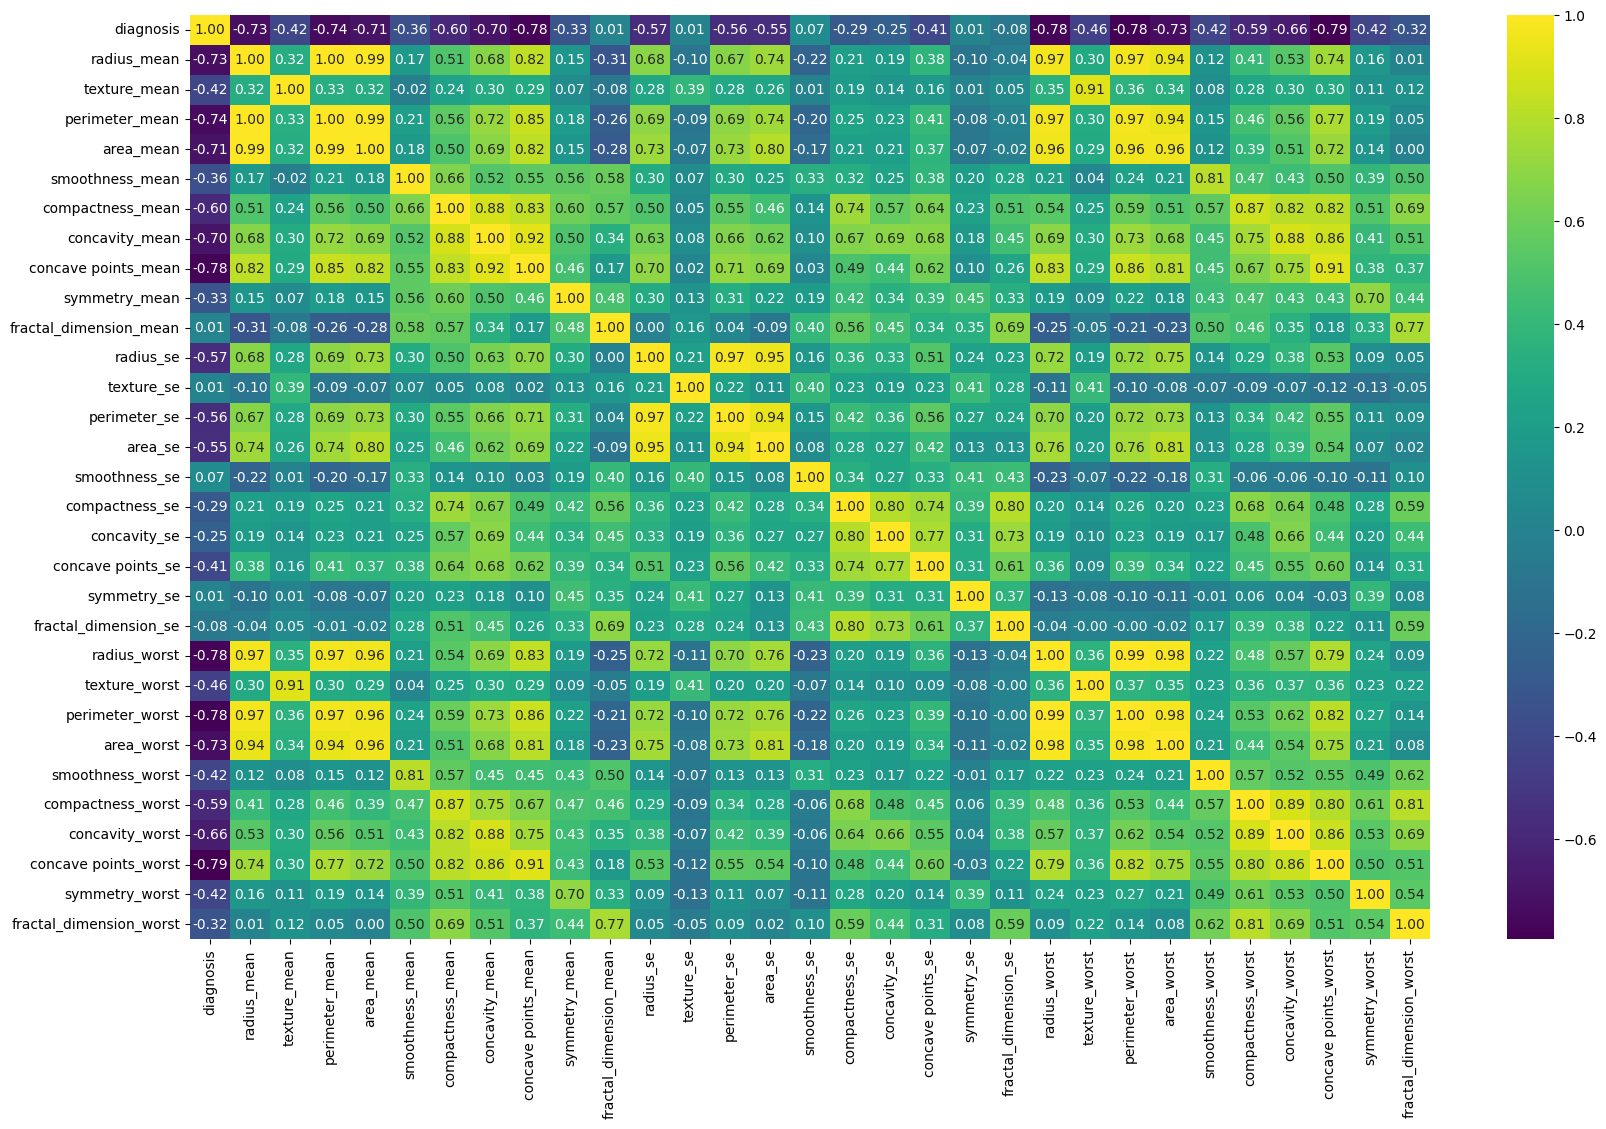

In [12]:
cm = df.corr()
plt.figure(figsize=(20,12))
sns.heatmap(cm,annot=True,cmap='viridis',fmt='.2f')
plt.show()

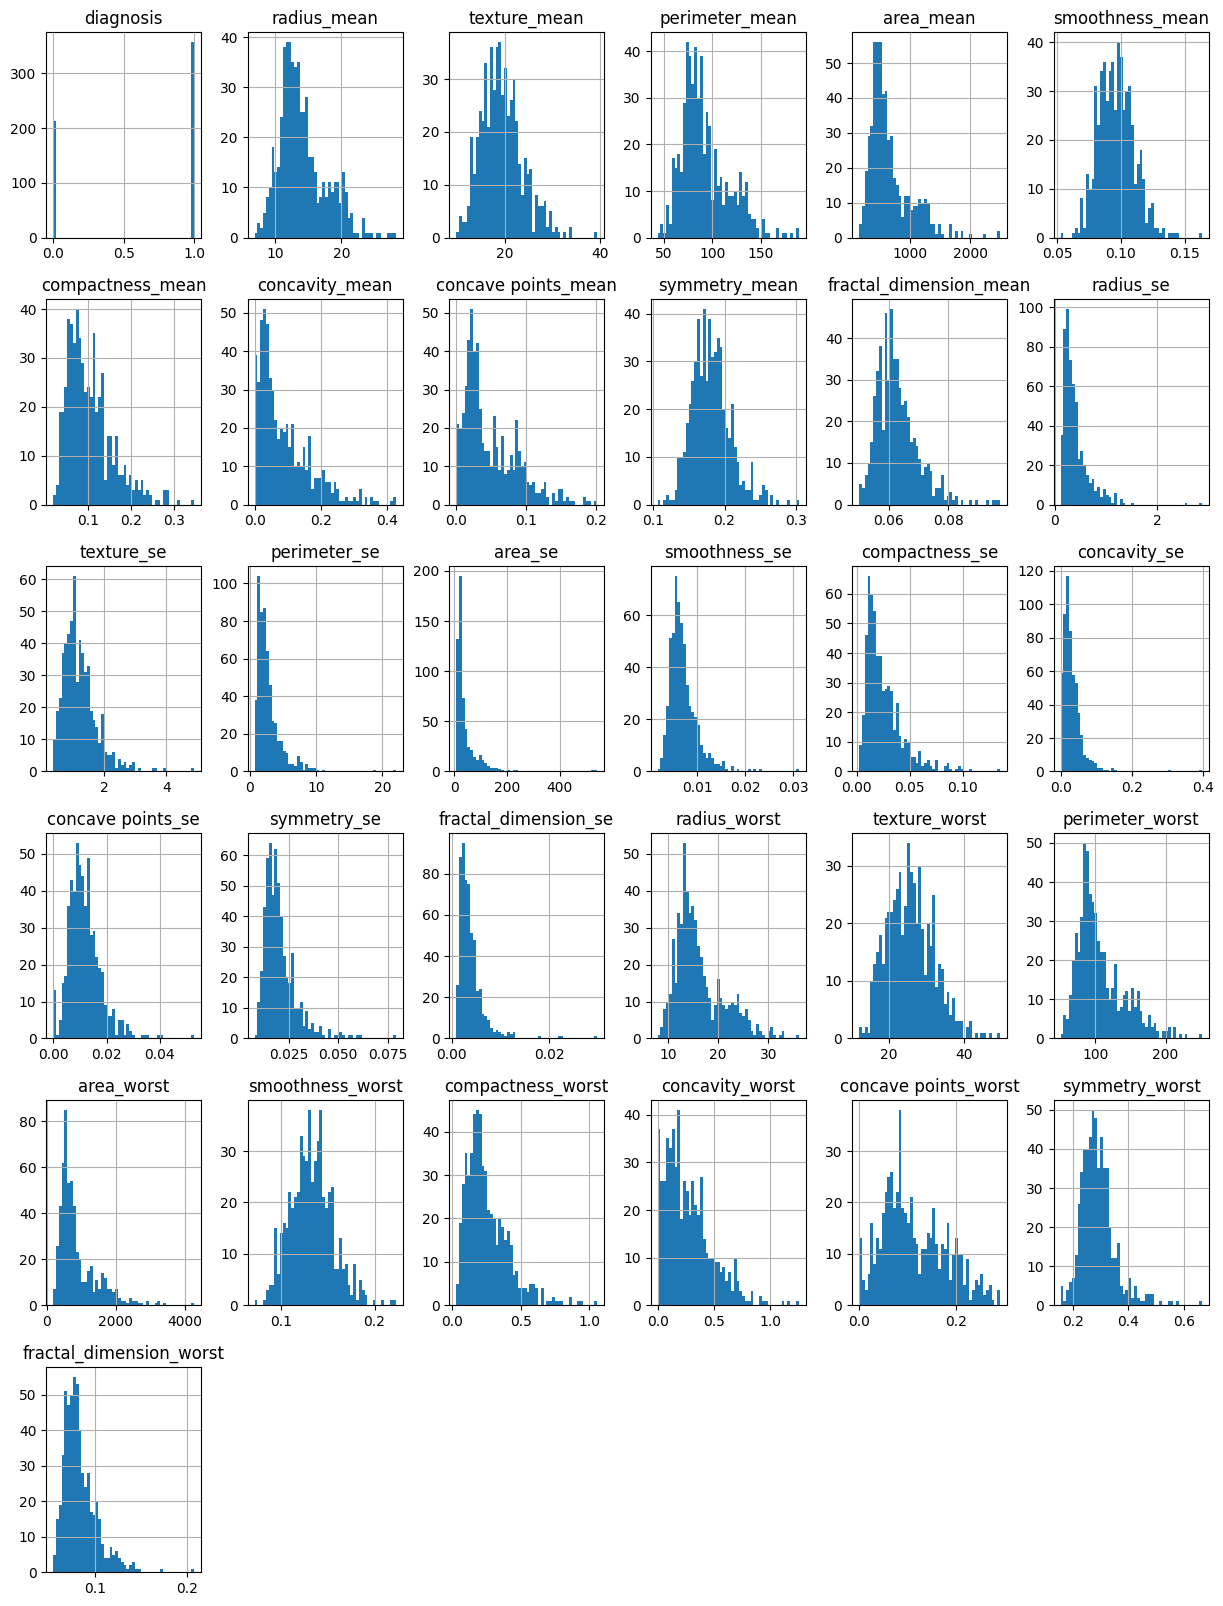

In [13]:
df.hist(figsize=(15,20),bins=50)
plt.show()

***PreProcessing***

In [14]:
X = df.drop('diagnosis',axis=1)
y=df['diagnosis']

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()

In [17]:
X = scaler.fit_transform(X)

Splitting

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

***KNN***

In [20]:
score=[]

In [21]:
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    score.append(knn.score(X_test,y_test))

In [22]:
score

[0.9385964912280702,
 0.9385964912280702,
 0.9473684210526315,
 0.956140350877193,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.956140350877193,
 0.9649122807017544]

n_neighbors=9

In [23]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.9649122807017544

In [24]:
knn.score(X_train,y_train)

0.978021978021978

It's good Fitted -->Accuracy-->96.491%

In [25]:
y_pred = knn.predict(X_test)

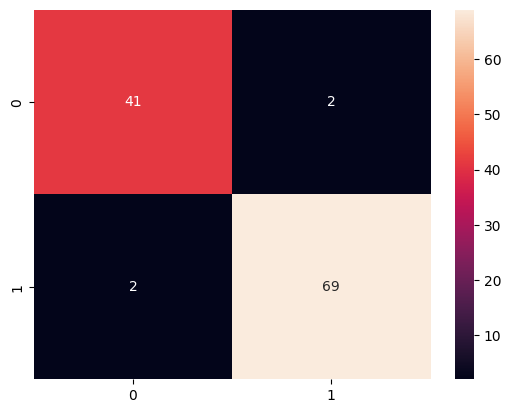

In [26]:
c_m = confusion_matrix(y_pred,y_test)
sns.heatmap(c_m,annot=True)
plt.show()

In [27]:
classification_report(y_pred,y_test,output_dict=True)

{'0': {'precision': 0.9534883720930233,
  'recall': 0.9534883720930233,
  'f1-score': 0.9534883720930233,
  'support': 43.0},
 '1': {'precision': 0.971830985915493,
  'recall': 0.971830985915493,
  'f1-score': 0.971830985915493,
  'support': 71.0},
 'accuracy': 0.9649122807017544,
 'macro avg': {'precision': 0.9626596790042581,
  'recall': 0.9626596790042581,
  'f1-score': 0.9626596790042581,
  'support': 114.0},
 'weighted avg': {'precision': 0.9649122807017544,
  'recall': 0.9649122807017544,
  'f1-score': 0.9649122807017544,
  'support': 114.0}}

In [28]:
roc_auc_score(y_pred,y_test)

0.9626596790042582

In [29]:
roc_curve(y_pred,y_test)
plt.show()

***LogisticRegression***

In [30]:
from sklearn.model_selection import GridSearchCV

In [31]:
reg = LogisticRegression()
reg.fit(X_train,y_train)

LogisticRegression()

In [32]:
reg.score(X_test,y_test)

0.9736842105263158

In [33]:
knn.score(X_train,y_train)

0.978021978021978

Model is good Fitted
Accuracy --> 97.368%

In [34]:
y_pred = knn.predict(X_test)

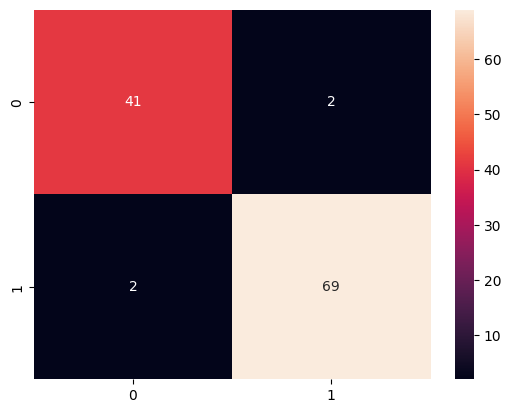

In [35]:
c_m = confusion_matrix(y_pred,y_test)
sns.heatmap(c_m,annot=True)
plt.show()

In [36]:
classification_report(y_pred,y_test,output_dict=True)

{'0': {'precision': 0.9534883720930233,
  'recall': 0.9534883720930233,
  'f1-score': 0.9534883720930233,
  'support': 43.0},
 '1': {'precision': 0.971830985915493,
  'recall': 0.971830985915493,
  'f1-score': 0.971830985915493,
  'support': 71.0},
 'accuracy': 0.9649122807017544,
 'macro avg': {'precision': 0.9626596790042581,
  'recall': 0.9626596790042581,
  'f1-score': 0.9626596790042581,
  'support': 114.0},
 'weighted avg': {'precision': 0.9649122807017544,
  'recall': 0.9649122807017544,
  'f1-score': 0.9649122807017544,
  'support': 114.0}}

***Naive_Bayes***

In [37]:
from sklearn.naive_bayes import GaussianNB

In [38]:
nb = GaussianNB()

In [39]:
nb.fit(X_train,y_train)

GaussianNB()

In [40]:
nb.score(X_test,y_test)

0.9649122807017544

In [41]:
nb.score(X_train,y_train)

0.9362637362637363

Naive Bayes shows some overfitting issues .So using cross val Score

In [46]:
score= cross_val_score(nb,X_train,y_train,cv=10,scoring='accuracy')

In [47]:
score.mean()

0.9273913043478261

In [42]:
nbb= nb.predict(X_test)

In [43]:
CF = confusion_matrix(nbb,y_test)

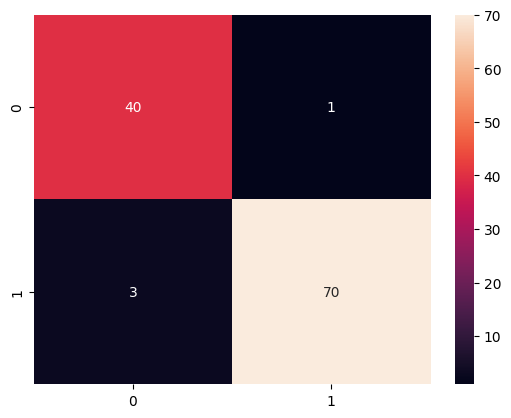

In [44]:
sns.heatmap(CF,annot=True)
plt.show()

In [45]:
classification_report(y_pred,y_test,output_dict=True)

{'0': {'precision': 0.9534883720930233,
  'recall': 0.9534883720930233,
  'f1-score': 0.9534883720930233,
  'support': 43.0},
 '1': {'precision': 0.971830985915493,
  'recall': 0.971830985915493,
  'f1-score': 0.971830985915493,
  'support': 71.0},
 'accuracy': 0.9649122807017544,
 'macro avg': {'precision': 0.9626596790042581,
  'recall': 0.9626596790042581,
  'f1-score': 0.9626596790042581,
  'support': 114.0},
 'weighted avg': {'precision': 0.9649122807017544,
  'recall': 0.9649122807017544,
  'f1-score': 0.9649122807017544,
  'support': 114.0}}

***DecisionTree***

In [48]:
tclf = DecisionTreeClassifier()

In [49]:
tclf.fit(X_train,y_train)

DecisionTreeClassifier()

In [50]:
tclf.score(X_train,y_train)

1.0

In [51]:
tclf.score(X_test,y_test)

0.9385964912280702

It is overfitted So using hyperparameter tuning

In [52]:
param_grid = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)

In [53]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 5, 7, None],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10]})

In [54]:
grid_search.best_params_

{'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10}

new model creating

In [55]:
n_tclf = DecisionTreeClassifier(max_depth=5,min_samples_leaf=2,min_samples_split=10)

In [56]:
n_tclf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=10)

In [57]:
n_tclf.score(X_test,y_test)

0.9473684210526315

In [58]:
n_tclf.score(X_train,y_train)

0.9912087912087912

Feature Importance

In [61]:
for name,score in zip(df.columns,n_tclf.feature_importances_):
    print(name,score)

diagnosis 0.0
radius_mean 0.06018868332809244
texture_mean 0.0
perimeter_mean 0.0
area_mean 0.0
smoothness_mean 0.0
compactness_mean 0.0
concavity_mean 0.7116500727346001
concave points_mean 0.0
symmetry_mean 0.0
fractal_dimension_mean 0.0
radius_se 0.0
texture_se 0.0
perimeter_se 0.012333176532506233
area_se 0.001272540707676563
smoothness_se 0.0
compactness_se 0.01909735918460881
concavity_se 0.01639694074787114
concave points_se 0.0
symmetry_se 0.0
fractal_dimension_se 0.05382951431371581
radius_worst 0.0
texture_worst 0.05300064271490152
perimeter_worst 0.0
area_worst 0.004659377331261668
smoothness_worst 0.0
compactness_worst 0.0
concavity_worst 0.06757169240476557
concave points_worst 0.0
symmetry_worst 0.0


In [62]:
X = df[['radius_mean','concavity_mean','perimeter_se','area_se','compactness_se','concavity_se','fractal_dimension_se','texture_worst','area_worst','concavity_worst']]
y=df['diagnosis']

new splitting for DT

In [ ]:
scaler=StandardScaler()

In [ ]:
X=scaler.fit_transform(X)

In [63]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [64]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 5, 7, None],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10]})

In [65]:
grid_search.best_params_

{'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 10}

In [66]:
n_tclf = DecisionTreeClassifier(max_depth=3,min_samples_leaf=5,min_samples_split=10)

In [67]:
n_tclf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, min_samples_split=10)

In [68]:
n_tclf.score(X_test,y_test)

0.9649122807017544

In [69]:
n_tclf.score(X_train,y_train)

0.9604395604395605

In [70]:
nbb= n_tclf.predict(X_test)

In [71]:
CF = confusion_matrix(nbb,y_test)

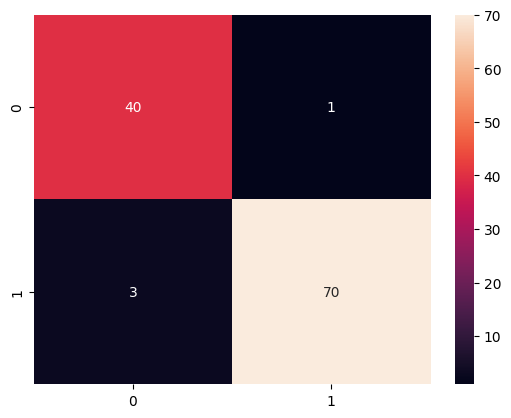

In [72]:
sns.heatmap(CF,annot=True)
plt.show()

In [73]:
classification_report(nbb,y_test,output_dict=True)

{'0': {'precision': 0.9302325581395349,
  'recall': 0.975609756097561,
  'f1-score': 0.9523809523809523,
  'support': 41.0},
 '1': {'precision': 0.9859154929577465,
  'recall': 0.958904109589041,
  'f1-score': 0.9722222222222222,
  'support': 73.0},
 'accuracy': 0.9649122807017544,
 'macro avg': {'precision': 0.9580740255486406,
  'recall': 0.9672569328433009,
  'f1-score': 0.9623015873015872,
  'support': 114.0},
 'weighted avg': {'precision': 0.9658891742950563,
  'recall': 0.9649122807017544,
  'f1-score': 0.9650863269284321,
  'support': 114.0}}

**RandomForest**

In [74]:
rclf = RandomForestClassifier()

In [75]:
X = df.drop('diagnosis',axis=1)
y=df['diagnosis']

In [76]:
scaler = StandardScaler()

In [78]:
X=scaler.fit_transform(X)

In [79]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [80]:
rclf.fit(X_train,y_train)

RandomForestClassifier()

In [82]:
rclf.score(X_train,y_train)

1.0

In [83]:
rclf.score(X_test,y_test)

0.9649122807017544

Overfitted. So using hyperparameter tuning

In [84]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)

In [85]:
grid_search.fit(X_train,y_train)

C:\Users\Apple store\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Apple store\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Apple store\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\Apple store\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 666, in 

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [86]:
grid_search.best_params_

{'max_depth': None,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [87]:
n_rclf = RandomForestClassifier(max_depth=None,max_features='log2',min_samples_leaf=1,min_samples_split=2,n_estimators=100)

In [88]:
n_rclf.fit(X_train,y_train)

RandomForestClassifier(max_features='log2')

In [89]:
n_rclf.score(X_train,y_train)

1.0

In [90]:
n_rclf.score(X_test,y_test)

0.9649122807017544

In [91]:
for name,score in zip(df.columns,n_rclf.feature_importances_):
    print(name,score)

diagnosis 0.05280055150047773
radius_mean 0.01326561582249576
texture_mean 0.03850548232898913
perimeter_mean 0.051042955091899544
area_mean 0.005253652486409406
smoothness_mean 0.01439900450254183
compactness_mean 0.03762801100467508
concavity_mean 0.13947499930475576
concave points_mean 0.004982229793152516
symmetry_mean 0.003750528501335922
fractal_dimension_mean 0.02005871640496394
radius_se 0.006480682766811245
texture_se 0.015388082288608933
perimeter_se 0.03315473347723051
area_se 0.005135158737359564
smoothness_se 0.005311266531009718
compactness_se 0.007005750673984576
concavity_se 0.0071382846719521284
concave points_se 0.005149092318562164
symmetry_se 0.005618314501457427
fractal_dimension_se 0.14616398624364796
radius_worst 0.021112047696834117
texture_worst 0.08476441965407171
perimeter_worst 0.07971219775037522
area_worst 0.016389746904138996
smoothness_worst 0.020089186506906897
compactness_worst 0.04123466604922623
concavity_worst 0.09419136232545844
concave points_wors

In [129]:
X=df[['concavity_mean','fractal_dimension_se','concavity_worst','texture_worst','perimeter_worst','perimeter_mean','compactness_worst','smoothness_worst',
      'radius_worst','perimeter_se','fractal_dimension_mean','compactness_mean','texture_mean','radius_mean','smoothness_mean','texture_se',
     'area_worst','concave points_worst','symmetry_worst','compactness_se','concavity_se','radius_se']]
y=df['diagnosis']
    

In [130]:
scaler=StandardScaler()

In [131]:
X=scaler.fit_transform(X)

In [132]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [133]:
grid_search.fit(X_train,y_train)

C:\Users\Apple store\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Apple store\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Apple store\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\Apple store\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 666, in 

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [134]:
grid_search.best_params_

{'max_depth': 30,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [175]:
n_rclf=RandomForestClassifier(max_depth=95,max_features='log2',min_samples_leaf=7,min_samples_split=12,n_estimators=300)

In [176]:
n_rclf.fit(X_train,y_train)

RandomForestClassifier(max_depth=95, max_features='log2', min_samples_leaf=7,
                       min_samples_split=12, n_estimators=300)

In [177]:
n_rclf.score(X_train,y_train)

0.9758241758241758

In [178]:
n_rclf.score(X_test,y_test)

0.9649122807017544

In [179]:
score= cross_val_score(n_rclf,X_train,y_train,cv=10,scoring='accuracy')

In [180]:
score.mean()

0.9515942028985508

In [181]:
nbb= n_rclf.predict(X_test)

In [182]:
CF = confusion_matrix(nbb,y_test)

In [183]:
classification_report(nbb,y_test,output_dict=True)

{'0': {'precision': 0.9302325581395349,
  'recall': 0.975609756097561,
  'f1-score': 0.9523809523809523,
  'support': 41.0},
 '1': {'precision': 0.9859154929577465,
  'recall': 0.958904109589041,
  'f1-score': 0.9722222222222222,
  'support': 73.0},
 'accuracy': 0.9649122807017544,
 'macro avg': {'precision': 0.9580740255486406,
  'recall': 0.9672569328433009,
  'f1-score': 0.9623015873015872,
  'support': 114.0},
 'weighted avg': {'precision': 0.9658891742950563,
  'recall': 0.9649122807017544,
  'f1-score': 0.9650863269284321,
  'support': 114.0}}

***SupportVectorMachine***

In [184]:
from sklearn.svm import SVC

In [185]:
model = SVC()

In [190]:
X=df.drop('diagnosis',axis=1)
y=df['diagnosis']

In [191]:
scaler=StandardScaler()

In [192]:
X=scaler.fit_transform(X)

In [193]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [194]:
model.fit(X_train,y_train)

SVC()

In [195]:
model.score(X_train,y_train)

0.9868131868131869

In [196]:
model.score(X_test,y_test)

0.9736842105263158

In [199]:
pg ={
    'C' : [1,2,5,7,10,15],
    'kernel':['linear','poly','rbf']
}
grid_search = GridSearchCV(SVC(), pg, cv=5)

In [200]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 2, 5, 7, 10, 15],
                         'kernel': ['linear', 'poly', 'rbf']})

In [201]:
grid_search.best_params_

{'C': 2, 'kernel': 'rbf'}

In [203]:
model = SVC(C=2,kernel='rbf')

In [204]:
model.fit(X_train,y_train)

SVC(C=2)

In [205]:
model.score(X_train,y_train)

0.9912087912087912

In [206]:
model.score(X_test,y_test)

0.9824561403508771

Best Accuracy is for SVM with best fitted ! 

In [207]:
y_pred= model.predict(X_test)

In [208]:
CF = confusion_matrix(y_pred,y_test)

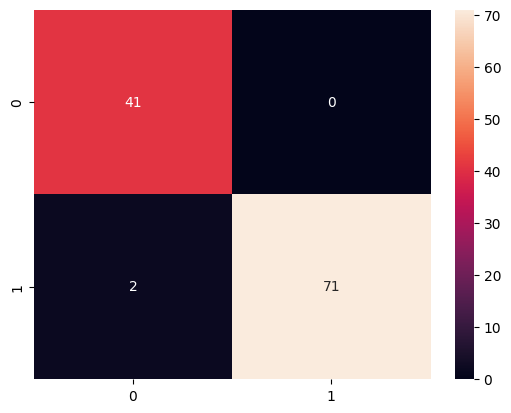

In [209]:
sns.heatmap(CF,annot=True)
plt.show()

In [210]:
classification_report(y_pred,y_test,output_dict=True)

{'0': {'precision': 0.9534883720930233,
  'recall': 1.0,
  'f1-score': 0.9761904761904762,
  'support': 41.0},
 '1': {'precision': 1.0,
  'recall': 0.9726027397260274,
  'f1-score': 0.9861111111111112,
  'support': 73.0},
 'accuracy': 0.9824561403508771,
 'macro avg': {'precision': 0.9767441860465116,
  'recall': 0.9863013698630136,
  'f1-score': 0.9811507936507937,
  'support': 114.0},
 'weighted avg': {'precision': 0.9832721338229294,
  'recall': 0.9824561403508771,
  'f1-score': 0.9825431634642161,
  'support': 114.0}}

In [211]:
roc_auc_score(y_pred,y_test)

0.9863013698630136

In [221]:
pip install imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [222]:
from imblearn.over_sampling import SMOTE

In [223]:
smote=SMOTE(random_state=42)

In [224]:
X_train,X_train,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [225]:
X_train_re,y_train_re = smote.fit_resample(X_train,y_train)

ValueError: Found input variables with inconsistent numbers of samples: [114, 455]